<a href="https://colab.research.google.com/github/Pavankuamr14/deeplearning/blob/main/Implementation_neural_network_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all package which are required for implementation_nueral_network_using_keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
dataset= pd.read_csv('/content/ENB2012_data.csv')

In [3]:
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
# note X1=Relative Compactness , X2=Surface Area, X3=Wall Area, X4=Roof Area, X5=Overall Height,X6=Orientation, X7=Glazing Area, X8=Glazing Area Distribution, Y1=Heating Load, Y2=Cooling Load



In [5]:
dataset.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
# get summary of statistics of the data
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
# shape of dataframe
dataset.shape

(768, 10)

In [10]:
# the isnull() method is used to check and manage Null values in dataframe
dataset.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [27]:
# data split into train and testing
X=dataset.iloc[:,:-2].values
Y=dataset.iloc[:,-1].values
print(X)


[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]


In [28]:
X.shape

(768, 8)

In [29]:
Y.shape

(768,)

In [30]:
X

array([[9.800e-01, 5.145e+02, 2.940e+02, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 4.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 3.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 4.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 4.000e-01,
        5.000e+00]])

In [31]:
Y

array([21.33, 21.33, 21.33, 21.33, 28.28, 25.38, 25.16, 29.6 , 27.3 ,
       21.97, 23.49, 27.87, 23.77, 21.46, 21.16, 24.93, 37.73, 31.27,
       30.93, 39.44, 29.79, 29.68, 29.79, 29.4 , 10.9 , 11.19, 10.94,
       11.17, 11.27, 11.72, 11.29, 11.67, 11.74, 12.05, 11.73, 11.93,
       12.4 , 12.23, 12.4 , 12.14, 16.78, 16.8 , 16.75, 16.67, 12.07,
       12.22, 12.08, 12.04, 26.47, 26.37, 26.44, 26.29, 32.92, 29.87,
       29.58, 34.33, 30.89, 25.6 , 27.03, 31.73, 27.31, 24.91, 24.61,
       28.51, 41.68, 35.28, 34.43, 43.33, 33.87, 34.07, 34.14, 33.67,
       13.43, 13.71, 13.48, 13.7 , 13.8 , 14.28, 13.87, 14.27, 14.28,
       14.61, 14.3 , 14.45, 13.9 , 13.72, 13.88, 13.65, 19.37, 19.43,
       19.34, 19.32, 14.34, 14.5 , 14.33, 14.27, 25.95, 25.63, 26.13,
       25.89, 32.54, 29.44, 29.36, 34.2 , 30.91, 25.63, 27.36, 31.9 ,
       27.38, 25.02, 24.8 , 28.79, 41.07, 34.62, 33.87, 42.86, 33.91,
       34.07, 34.17, 33.78, 13.39, 13.72, 13.57, 13.79, 13.67, 14.11,
       13.8 , 14.21,

In [17]:
# above we can see that Y values are the target variable and it has values different which we can say that is a regression problem


In [34]:
# # feature normalization
# import keras
# X=keras.utils.normalize(X)
# X
# feature noramalization
import keras
# import standardScaler
# from preprocessing import StandardScaler
# sc=StandardScaler()
# X=sc.fit_transform(X)
# X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

scaler

StandardScaler()

In [35]:
# feature normalization
scaler.transform(X)


array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.34164079,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -0.4472136 ,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ...,  0.4472136 ,
        -1.76044698, -1.81457514],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ..., -0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.34164079,
         1.2440492 ,  1.41133622]])

In [36]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
X_train.shape

(614, 8)

In [39]:
Y_train.shape

(614,)

In [40]:
X_test.shape

(154, 8)

In [41]:
Y_test.shape

(154,)

In [42]:
# model bulid the neural network
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

In [43]:
# compile model
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [44]:
# fit the model
history = model.fit(X_train,Y_train,validatation_data=(X_test,Y_test),epochs=100,batch_size=10)

TypeError: Model.fit() got an unexpected keyword argument 'validatation_data'

In [45]:
# fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=10)

Epoch 1/100
62/62 [==============================] - 1s 5ms/step - loss: 494.3596 - mse: 494.3596 - val_loss: 136.0061 - val_mse: 136.0061
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 119.7045 - mse: 119.7045 - val_loss: 114.9003 - val_mse: 114.9003
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 104.5481 - mse: 104.5481 - val_loss: 101.6022 - val_mse: 101.6022
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 91.7769 - mse: 91.7769 - val_loss: 81.3612 - val_mse: 81.3612
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 76.8995 - mse: 76.8995 - val_loss: 72.3969 - val_mse: 72.3969
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 69.0961 - mse: 69.0961 - val_loss: 66.5622 - val_mse: 66.5622
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 62.6349 - mse: 62.6349 - val_loss: 60.3590 - val_mse: 60.3590
Epoch 8/100
62/62 [========================

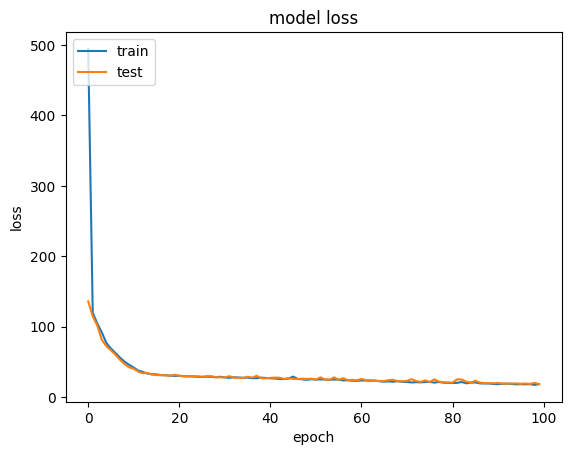

In [47]:
# we will plot the training loss
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# we will see our X_test and output of it
test_predictions = model.predict(X_test).flatten()
test_predictions

5/5 [==============================] - 0s 4ms/step


array([17.421787 , 10.372206 , 32.375854 , 29.438566 , 29.93496  ,
       32.440975 , 30.383242 , 30.321724 , 30.405903 , 30.838188 ,
       11.673538 , 33.115948 , 18.58208  , 33.084854 , 34.923073 ,
       30.020298 , 13.748083 , 32.136837 , 23.233809 , 12.202183 ,
       14.947975 , 30.239098 , 11.816582 , 32.086525 ,  9.554232 ,
       12.556686 , 22.879292 , 11.631769 , 12.522606 , 33.924732 ,
       22.204369 , 17.711113 , 33.05377  , 17.09838  , 30.388786 ,
       38.13312  , 10.406294 , 38.741405 , 21.750095 , 16.127457 ,
       16.712778 , 33.374184 , 15.364668 , 32.511448 , 26.045355 ,
       30.234335 , 14.973555 , 16.235638 , 32.75066  , 31.373137 ,
       30.537693 , 21.009987 , 39.178596 , 18.003437 , 38.437263 ,
       10.403305 , 29.218946 , 31.285978 , 35.24349  , 16.559042 ,
       18.06562  , 11.558357 , 30.841837 , 12.210424 , 11.589443 ,
       10.051786 , 34.018013 , 15.175112 , 30.633032 , 34.630756 ,
       30.244644 , 13.71698  , 32.09475  , 21.719002 , 20.7462

In [50]:
true_predicted = pd.DataFrame(data={'Predicted': test_predictions, 'True': Y_test})
true_predicted

,Predicted,True
0,17.421787,17.63
1,10.372206,13.57
2,32.375854,34.62
3,29.438566,21.16
4,29.934959,33.34
...,...,...
149,21.302311,15.41
150,31.295662,30.00
151,17.969349,15.00
152,23.846546,14.75


In [51]:
ped_train = model.predict(X_train)
print(np.sqrt(sklearn.metrics.mean_squared_error(Y_train, ped_train)))

20/20 [==============================] - 0s 2ms/step
4.117232303755995


In [52]:
pred= model.predict(X_test)
print(np.sqrt(sklearn.metrics.mean_squared_error(Y_test,pred)))

5/5 [==============================] - 0s 2ms/step
4.305543708624036


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 5ms/step - loss: 18.5377 - mse: 18.5377


[18.537708282470703, 18.537708282470703]

<Axes: >

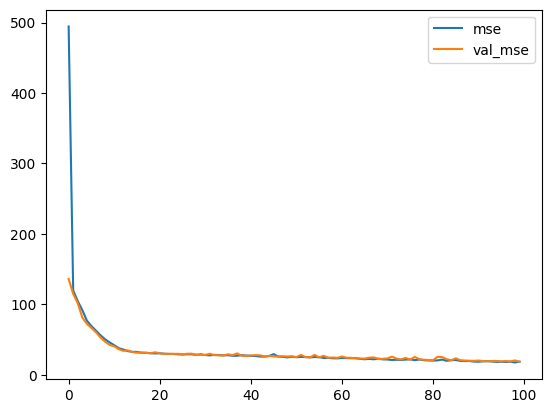

In [56]:
MSE_COLS = ["mse", "val_mse"]

pd.DataFrame(history.history)[MSE_COLS].plot()